# Uncertainty in estimating the bias on a coin

In [2]:
library(tidyverse)

theme_set(theme_bw())

In [4]:
# set a random seed so we all agree on the results
set.seed(42)

# true probability of the coin
p <- 0.5

# number of flips in an experiment
n <- 100

# flip n times and show the results
rbinom(n, 1, p)

[1] 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0
 [38] 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 [75] 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1

In [2]:
# perform one experiment of 100 flips and estimate the bias by measuring the fractions of heads that we saw
mean(rbinom(n, 1, p))

[1] 0.56

In [3]:
# now repeat this experiment 100,000 times
p_hat <- replicate(1e5, mean(rbinom(n, 1, p)))

# show the results of the first five experiments
head(p_hat)

[1] 0.38 0.46 0.40 0.49 0.47 0.50

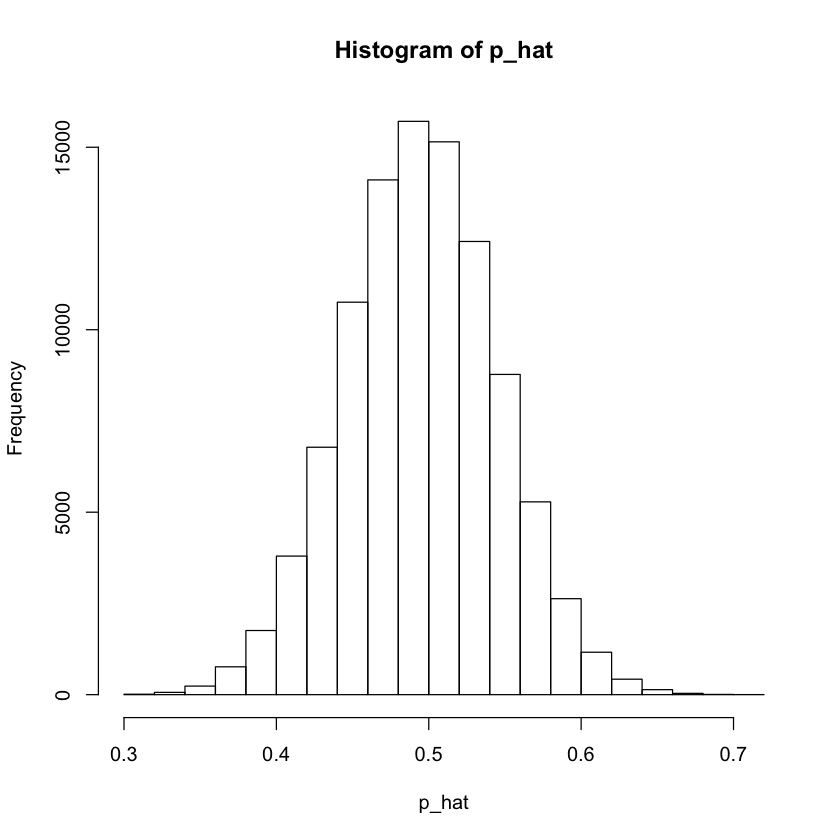

In [4]:
# look at a histogram of the estimates to see how much they vary from one experiment to the next
hist(p_hat)

In [5]:
# compute the standard deviation of these estimates across all of our experiments
# also known as the standard error of our estimate of the mean
sd(p_hat)

[1] 0.04994995

In [6]:
# compare this to what we learned in stats class for the standard error on the estimated mean
sqrt( p_hat[1] * (1 - p_hat[1]) / n)

[1] 0.04853864

In [5]:
# repeat this for different sample sizes
plot_data <- data.frame()
for (n in c(100, 200, 400, 800)) {
  tmp <- data.frame(n = n, p_hat = replicate(1e5, mean(rbinom(n,1,p))))
  plot_data <- rbind(plot_data, tmp)
}

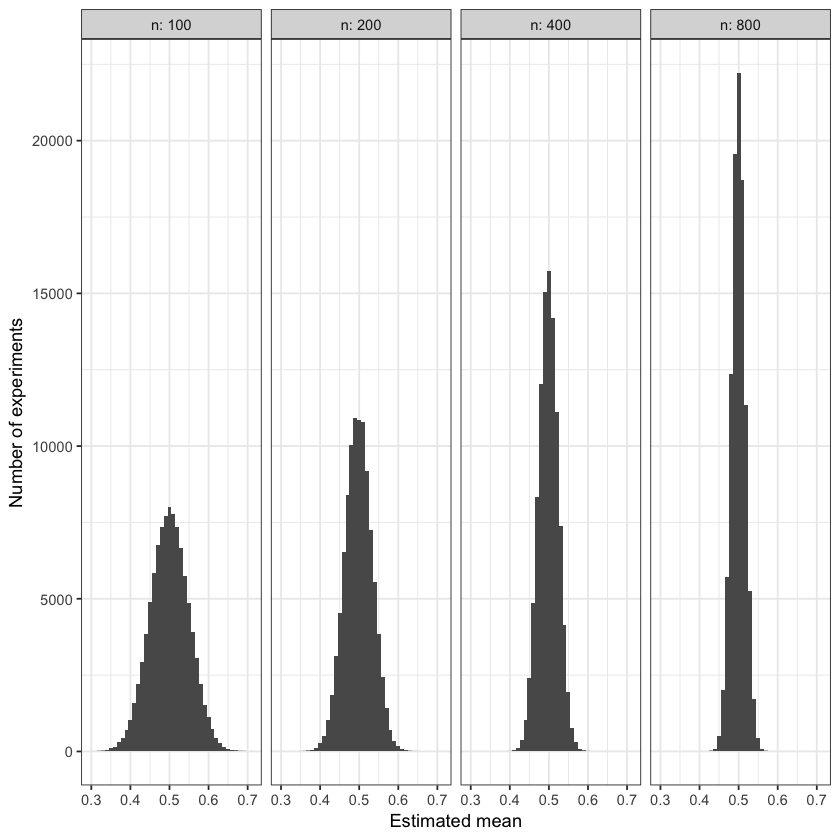

In [6]:
# plot sampling distributions as sample size increases (facets)
ggplot(plot_data, aes(x = p_hat)) +
  geom_histogram(binwidth = 0.01) +
  facet_wrap(~ n, nrow = 1, labeller = label_both) +
  labs(x = 'Estimated mean',
       y = 'Number of experiments')

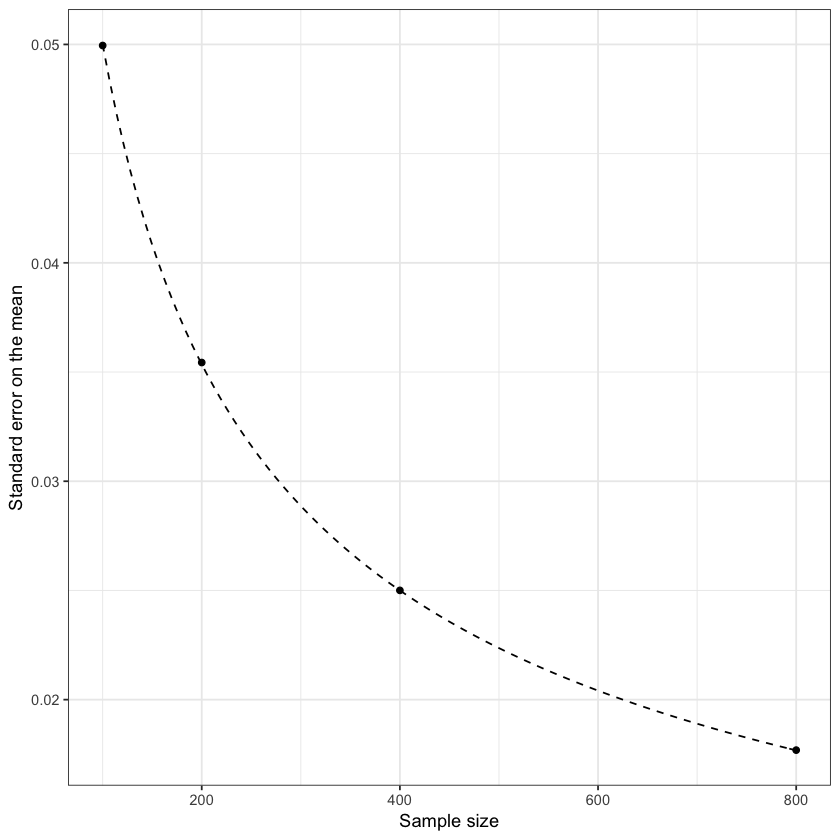

In [7]:
# compute the standard deviation of the sampling distribution at each sample size
se_data <- plot_data %>%
  group_by(n) %>%
  summarize(se = sd(p_hat))

# plot the actual standard errors and compare this to the asymptotic formula
ggplot(se_data, aes(x=n, y=se)) +
  geom_point() + 
  stat_function(fun=function(n) {sqrt(p * (1 - p) / n)}, linetype=2) +
  labs(x = 'Sample size',
       y = 'Standard error on the mean')